In [22]:
import torch
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [6]:
from sklearn.datasets import make_blobs

In [7]:
# Creating multi class datasets

In [8]:
NUM = 4
NUM_FEATURES =2
RANDOM_SEED = 42

In [60]:
X_blob, y_blob = make_blobs(n_samples =1000,
                            n_features = NUM_FEATURES,
                          centers = NUM,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)
X_blob

array([[-8.41339595,  6.93516545],
       [-5.76648413, -6.43117072],
       [-6.04213682, -6.76610151],
       ...,
       [ 3.2157805 ,  5.92174278],
       [-7.79389549, -7.16056655],
       [-9.6815798 ,  7.0096901 ]])

In [61]:
X_blob = torch.from_numpy(X_blob).type(torch.float)

In [62]:
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_blob,y_blob, test_size = 0.2,
                                                    random_state = 42)

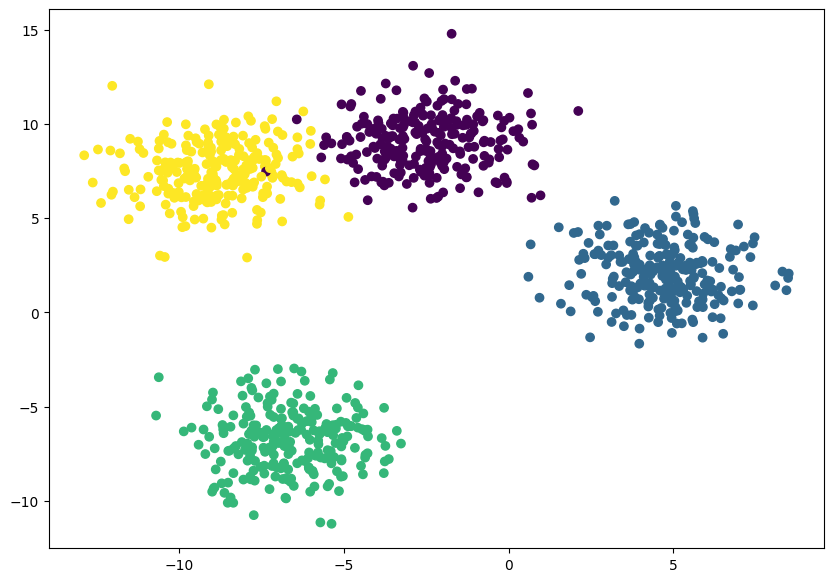

In [64]:
plt.figure(figsize =(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c= y_blob)

In [65]:
from torch import nn

In [84]:
model_1 = nn.Sequential(
    nn.Linear(in_features =2 , out_features = 10),
    # nn.ReLU(),

    nn.Linear(in_features = 10, out_features =10),
    # nn.ReLU(),


    nn.Linear(in_features = 10, out_features =4  ),


).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.1)


In [85]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=4, bias=True)
)

In [86]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) *100
  return acc

In [87]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test.to(device))

y_preds[:10]

tensor([[-0.4636,  0.5324,  0.1829, -0.2480],
        [ 0.8062,  3.0983,  0.5159, -0.8397],
        [ 0.6574, -1.0975, -0.5037,  0.2106],
        [-0.3592, -0.2018, -0.0276, -0.0586],
        [ 0.0107,  2.7798,  0.6318, -0.7937],
        [ 0.9816,  3.6292,  0.6063, -0.9659],
        [ 0.4725, -1.5773, -0.5789,  0.3235],
        [ 0.2170,  2.7868,  0.5827, -0.7866],
        [ 0.9520, -0.5615, -0.4414,  0.0882],
        [ 0.1390,  2.7330,  0.5884, -0.7764]])

In [88]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [89]:
y_pred_probs = torch.softmax(y_preds, dim=1)
y_pred_probs[:10]

tensor([[0.1458, 0.3949, 0.2784, 0.1809],
        [0.0845, 0.8360, 0.0632, 0.0163],
        [0.4704, 0.0814, 0.1473, 0.3009],
        [0.2035, 0.2382, 0.2835, 0.2748],
        [0.0519, 0.8282, 0.0967, 0.0232],
        [0.0627, 0.8853, 0.0431, 0.0089],
        [0.4274, 0.0550, 0.1493, 0.3682],
        [0.0630, 0.8231, 0.0908, 0.0231],
        [0.5291, 0.1165, 0.1313, 0.2231],
        [0.0612, 0.8185, 0.0959, 0.0245]])

In [90]:
y_preds[:10]

tensor([[-0.4636,  0.5324,  0.1829, -0.2480],
        [ 0.8062,  3.0983,  0.5159, -0.8397],
        [ 0.6574, -1.0975, -0.5037,  0.2106],
        [-0.3592, -0.2018, -0.0276, -0.0586],
        [ 0.0107,  2.7798,  0.6318, -0.7937],
        [ 0.9816,  3.6292,  0.6063, -0.9659],
        [ 0.4725, -1.5773, -0.5789,  0.3235],
        [ 0.2170,  2.7868,  0.5827, -0.7866],
        [ 0.9520, -0.5615, -0.4414,  0.0882],
        [ 0.1390,  2.7330,  0.5884, -0.7764]])

In [91]:
torch.manual_seed(42)

epochs = 100

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_0 = model_1.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [92]:
for epoch in range(epochs):

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Calculate loss and accuracy

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()


  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                   y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc}| Test Loss: {test_loss:.2f} | Test Acc: {test_acc}")




Epoch: 0 | Loss: 2.61 Acc: 9.125| Test Loss: 0.55 | Test Acc: 75.0
Epoch: 10 | Loss: 0.03 Acc: 98.75| Test Loss: 0.03 | Test Acc: 99.0
Epoch: 20 | Loss: 0.02 Acc: 99.5| Test Loss: 0.01 | Test Acc: 100.0
Epoch: 30 | Loss: 0.03 Acc: 99.375| Test Loss: 0.01 | Test Acc: 99.5
Epoch: 40 | Loss: 0.02 Acc: 99.375| Test Loss: 0.01 | Test Acc: 99.5
Epoch: 50 | Loss: 0.02 Acc: 99.375| Test Loss: 0.01 | Test Acc: 100.0
Epoch: 60 | Loss: 0.02 Acc: 99.5| Test Loss: 0.00 | Test Acc: 100.0
Epoch: 70 | Loss: 0.02 Acc: 99.375| Test Loss: 0.00 | Test Acc: 100.0
Epoch: 80 | Loss: 0.02 Acc: 99.375| Test Loss: 0.00 | Test Acc: 100.0
Epoch: 90 | Loss: 0.02 Acc: 99.375| Test Loss: 0.00 | Test Acc: 100.0


In [93]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("Already exist")

else:
  print("Downloading the helper function")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)
# Download helper functiontype(y_train)

Already exist


In [94]:
from helper_function import plot_predictions, plot_decision_boundary

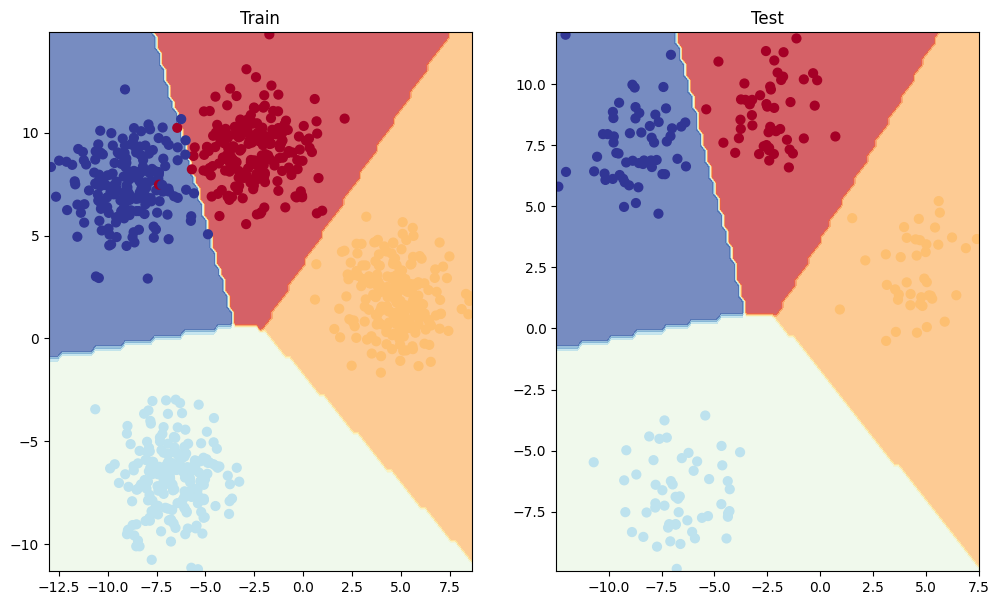

In [95]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train , y_train)
plt.subplot(1,2,2)

plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [96]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)

y_logits[:10]

tensor([[ 16.8026,  39.0460, -35.3495, -12.4192],
        [ 28.0316, -27.0717, -28.5267,  36.4666],
        [-31.6478, -24.2935,  59.7130, -15.1187],
        [  3.5645,  32.4068, -13.1850, -19.5283],
        [ 40.3100,  15.9920, -62.2642,  21.0164],
        [ 32.2270, -35.9801, -31.6181,  45.2973],
        [-34.8739, -14.8005,  61.1465, -23.4877],
        [ 35.9941,   4.7292, -51.7890,  24.1331],
        [-29.9316, -39.7074,  62.6516,  -4.4762],
        [ 36.8591,   8.9221, -54.5797,  22.3523]])

In [97]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.1870e-10, 1.0000e+00, 4.9029e-33, 4.4559e-23],
        [2.1708e-04, 2.5442e-28, 5.9380e-29, 9.9978e-01],
        [2.1015e-40, 3.2843e-37, 1.0000e+00, 3.1698e-33],
        [2.9781e-13, 1.0000e+00, 1.5838e-20, 2.7852e-23],
        [1.0000e+00, 2.7469e-11, 2.8026e-45, 4.1774e-09],
        [2.1067e-06, 5.0308e-36, 3.9449e-34, 1.0000e+00],
        [1.9898e-42, 1.0390e-33, 1.0000e+00, 1.7533e-37],
        [9.9999e-01, 2.6415e-14, 7.5214e-39, 7.0604e-06],
        [6.1890e-41, 4.2039e-45, 1.0000e+00, 7.0264e-30],
        [1.0000e+00, 7.3639e-13, 1.9437e-40, 5.0095e-07]])

In [98]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]


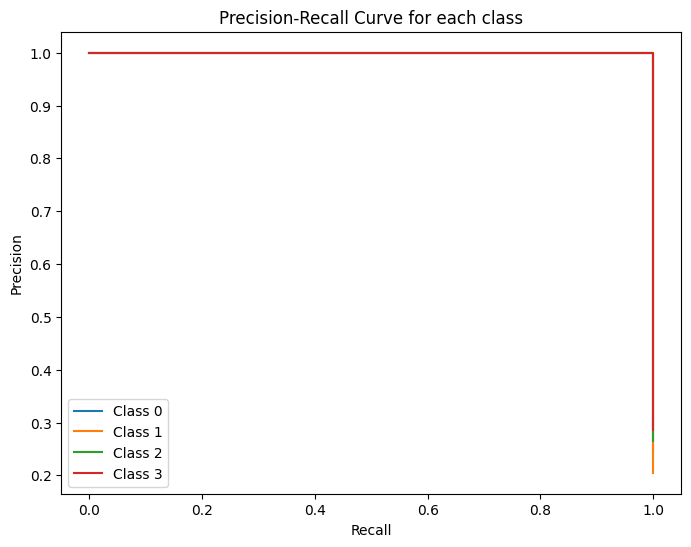

In [109]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming y_probs and y_test are your predicted probabilities and true labels, respectively

# Convert predicted probabilities to class predictions
y_preds = y_pred_probs.argmax(axis=1)


# Precision
precision = precision_score(y_test, y_preds, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_preds, average='weighted')
print(f'Recall: {recall}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_preds)
print(f'Confusion Matrix:\n{conf_matrix}')

# Precision-Recall Curve for each class
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_preds_bin = label_binarize(y_preds, classes=np.unique(y_test))

precision_curve = dict()
recall_curve = dict()

for i in range(n_classes):
    precision_curve[i], recall_curve[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall_curve[i], precision_curve[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc='best')
plt.show()


In [111]:
 y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])